# Car Mileage Prediction using Linear Regression📏
# This project predicts car mileage (mpg) based on engine size, weight, and horsepower using linear regression

### importing modules
#### we import the nedded python modules to clean the data visuvalize the data and to use the ml model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

###loading the data set using pandas🔃

In [ ]:
data=pd.read_csv('/content/auto-mpg.csv')

####analyzing the dataset:👀

In [ ]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


###it describe the data like min max count only works on numerical rows

In [ ]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


is null used to find the null values and .sum is used to sum those over here


In [ ]:
data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


can't convert any numeric values in string when it contains any specialcharacters so it gives an error

In [ ]:
# data['horsepower']=data['horsepower'].astype(int)

In [ ]:
data['horsepower'].isnull().sum()

np.int64(0)

##converting horsepower column into numeric type

In [ ]:
data['horsepower']=pd.to_numeric(data['horsepower'],errors='coerce')

after converting to numeric we can find that we have 6 null values


In [ ]:
data['horsepower'].isnull().sum()

np.int64(6)

now replacing the null values with medaiin of horespower column and we use inplace true over here to modify in existing rows rather than creating a new one


In [ ]:
data['horsepower'].fillna(data['horsepower'].median(),inplace=True)

/tmp/ipython-input-4210805579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['horsepower'].fillna(data['horsepower'].median(),inplace=True)


In [ ]:
data['horsepower']

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
...,...
393,86.0
394,52.0
395,84.0
396,79.0


over here we have two many unneccsary columns so we have to drop those these dont affetct the mileage of the car so even if we drop them dont effect the out

In [ ]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


so here we are dropping the colummns which are not needded

In [ ]:
data.drop(['car name','origin','cylinders','acceleration','model year'],axis=1,inplace=True)

after dropping the columns we can see the new dataframe which are required for our machine learning model

In [ ]:
data

,mpg,displacement,horsepower,weight
0,18.0,307.0,130.0,3504
1,15.0,350.0,165.0,3693
2,18.0,318.0,150.0,3436
3,16.0,304.0,150.0,3433
4,17.0,302.0,140.0,3449
...,...,...,...,...
393,27.0,140.0,86.0,2790
394,44.0,97.0,52.0,2130
395,32.0,135.0,84.0,2295
396,28.0,120.0,79.0,2625


#Training the Model
###we train the model using engine size,weight,horsepower and we wanna get the mileage as output

In [ ]:
x=data.drop(['mpg'],axis=1)
y=data['mpg']

we are splitting the data into two parts 80% training and 20% testing

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

asigning the data to our model

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

##now checking the predictions

In [ ]:
predictions=model.predict(x_test)

In [ ]:
print(predictions)

[24.48670329 17.11577106 22.69548276 28.23871934 24.32418808 26.58550006
 23.79225705 23.13023068 28.75868115 30.58251261 17.97731946 16.34951488
 32.14634791  8.65082422 23.73978181 15.83985098 20.7983515  22.5651187
 17.07670574 23.83802829 25.57387581 25.75271152 25.45110322 29.51067395
 24.02748527  7.73991604 29.07230621 22.44960206 23.35805413 28.57995475
 24.32117322 33.40244364 27.29444646 14.12706887 31.16714398 30.81093665
 29.3394784  27.85289757 26.26453134  7.8385224  26.02213196 30.70254871
 24.48481952 20.19438202 18.53468445 29.17887128 27.45109546 26.4922287
 23.20567814 28.81946789 30.40999599 27.23386501 29.2262683  30.23816612
 11.85254471 29.17616853 26.14734384 31.55006845 26.22979964 30.54082354
 27.30908534 22.34646895 13.51934062 28.21151849 28.11818258 28.85682334
 21.87601251 25.82090648 24.71696215 19.00661148 12.37773218 21.38473521
 17.27561866 29.16516325 21.85237589 28.7297826  19.84089194 21.59661367
 18.87033938 15.00749146]


In [ ]:
y_test

,mpg
126,21.0
214,13.0
207,20.0
395,32.0
392,27.0
...,...
352,29.9
135,18.0
366,17.6
291,19.2


In [ ]:
mse=mean_squared_error(predictions,y_test)
print(mse)

20.79882103143148


In [ ]:
r2=r2_score(predictions,y_test)
print(r2)

0.39944362534523115


In [ ]:
mae = mean_absolute_error(y_test, predictions)

In [ ]:

print(mae)

3.5818703849942266


## Visualization: Weight vs Mileage,Weigt vs Displacement,Weight vs Horsepower


##scatter plot between Displacement and mileage

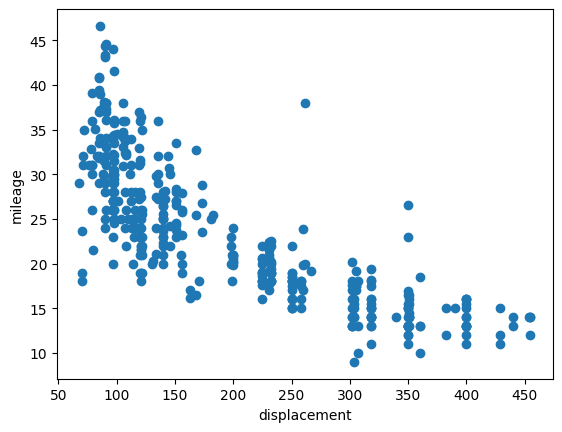

In [ ]:
x=data['displacement']
y=data['mpg']
plt.xlabel('displacement')
plt.ylabel('mileage')
plt.scatter(x,y)
plt.show()

##scatter plot between weight and mileage


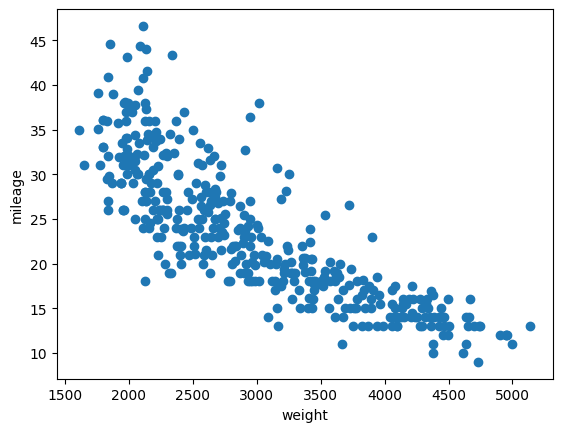

In [ ]:
x=data['weight']
y=data['mpg']
plt.xlabel('weight')
plt.ylabel('mileage')
plt.scatter(x,y)
plt.show()

##scatter plot between horsepower and mileage

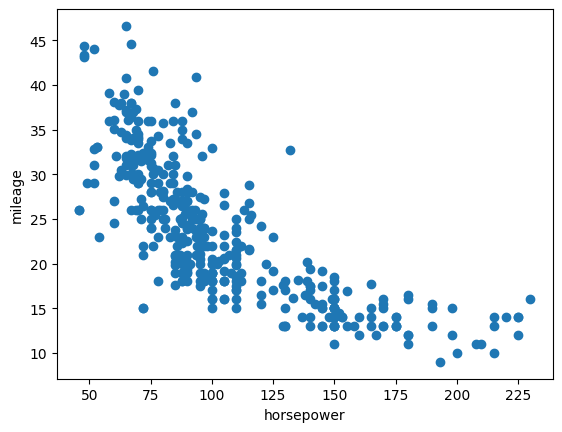

In [ ]:
x=data['horsepower']
y=data['mpg']
plt.xlabel('horsepower')
plt.ylabel('mileage')
plt.scatter(x,y)
plt.show()

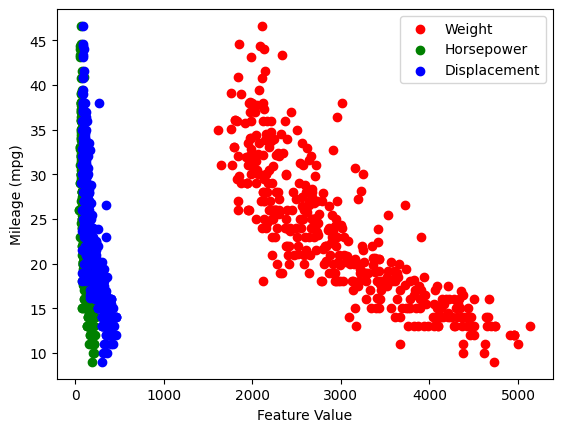

In [ ]:
plt.scatter(data['weight'], data['mpg'], color='red', label='Weight')
plt.scatter(data['horsepower'], data['mpg'], color='green', label='Horsepower')
plt.scatter(data['displacement'], data['mpg'], color='blue', label='Displacement')
plt.xlabel('Feature Value')
plt.ylabel('Mileage (mpg)')
plt.legend()
plt.show()

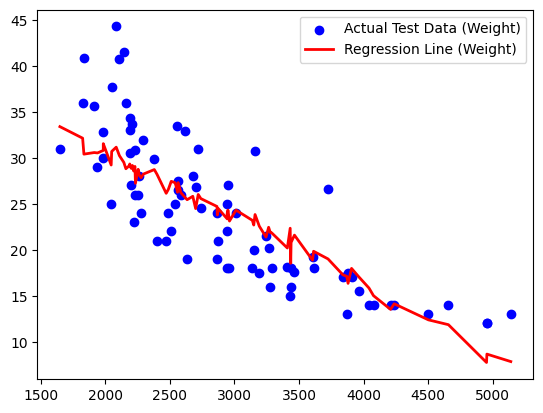

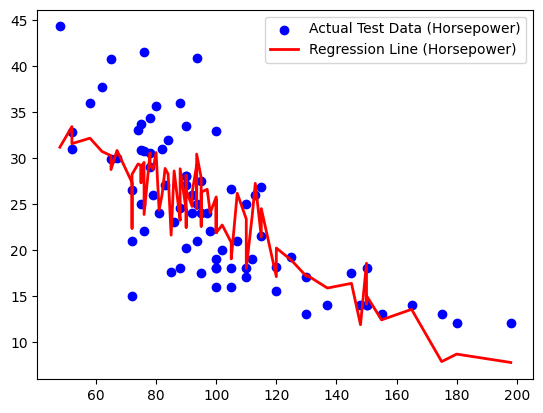

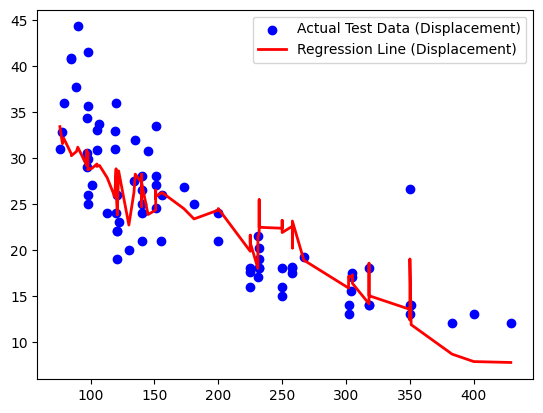

In [ ]:
import numpy as np
sorted_idx = np.argsort(x_test['weight'])
X_weight_sorted = x_test['weight'].iloc[sorted_idx]
y_test_sorted = y_test.iloc[sorted_idx]
y_pred_sorted = predictions[sorted_idx]

plt.scatter(X_weight_sorted, y_test_sorted, color='blue', label='Actual Test Data (Weight)')
plt.plot(X_weight_sorted, y_pred_sorted, color='red', linewidth=2, label='Regression Line (Weight)')
plt.legend()
plt.show()
sorted_idx = np.argsort(x_test['horsepower'])
X_hp_sorted = x_test['horsepower'].iloc[sorted_idx]
y_test_sorted = y_test.iloc[sorted_idx]
y_pred_sorted = predictions[sorted_idx]

plt.scatter(X_hp_sorted, y_test_sorted, color='blue', label='Actual Test Data (Horsepower)')
plt.plot(X_hp_sorted, y_pred_sorted, color='red', linewidth=2, label='Regression Line (Horsepower)')
plt.legend()
plt.show()

sorted_idx = np.argsort(x_test['displacement'])
X_disp_sorted = x_test['displacement'].iloc[sorted_idx]
y_test_sorted = y_test.iloc[sorted_idx]
y_pred_sorted = predictions[sorted_idx]

plt.scatter(X_disp_sorted, y_test_sorted, color='blue', label='Actual Test Data (Displacement)')
plt.plot(X_disp_sorted, y_pred_sorted, color='red', linewidth=2, label='Regression Line (Displacement)')
plt.legend()
plt.show()

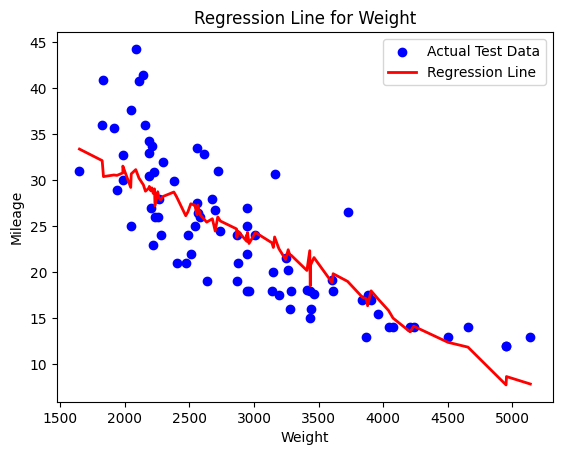

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sorted_idx = np.argsort(x_test['weight'])
X_sorted = x_test['weight'].iloc[sorted_idx]
y_test_sorted = y_test.iloc[sorted_idx]
y_pred_sorted = predictions[sorted_idx]

plt.scatter(X_sorted, y_test_sorted, color='blue', label='Actual Test Data')
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Weight")
plt.ylabel("Mileage")
plt.title("Regression Line for Weight")
plt.legend()
plt.show()

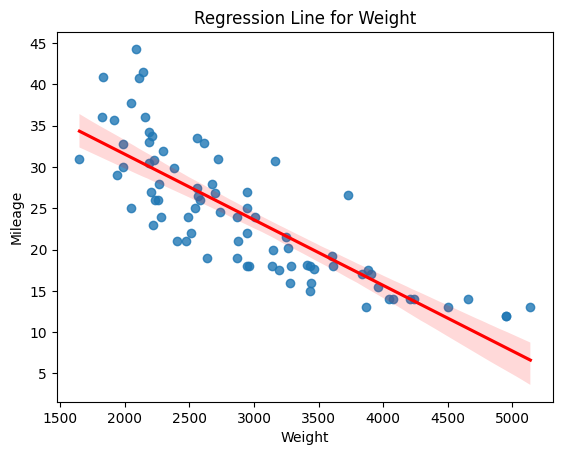

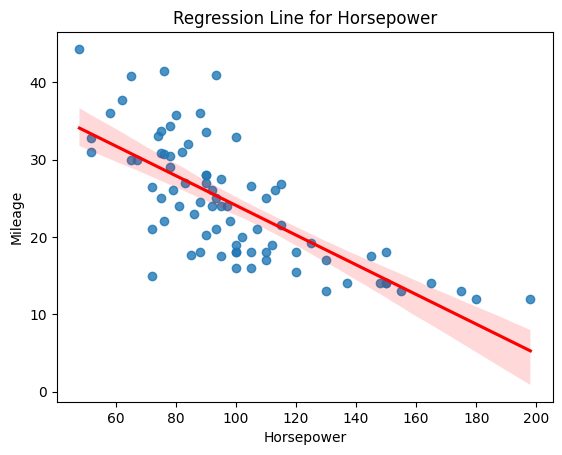

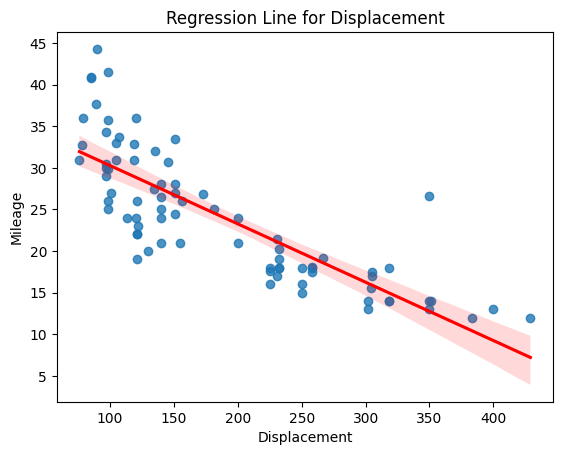

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=x_test['weight'], y=y_test, scatter=True, line_kws={"color":"red"})
plt.title("Regression Line for Weight")
plt.xlabel("Weight")
plt.ylabel("Mileage")
plt.show()

sns.regplot(x=x_test['horsepower'], y=y_test, scatter=True, line_kws={"color":"red"})
plt.title("Regression Line for Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("Mileage")
plt.show()

sns.regplot(x=x_test['displacement'], y=y_test, scatter=True, line_kws={"color":"red"})
plt.title("Regression Line for Displacement")
plt.xlabel("Displacement")
plt.ylabel("Mileage")
plt.show()

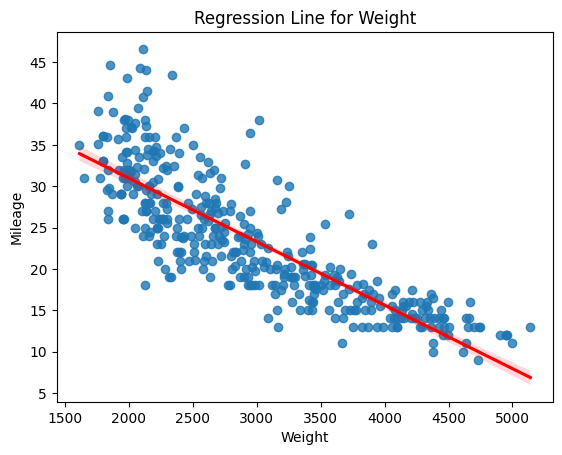

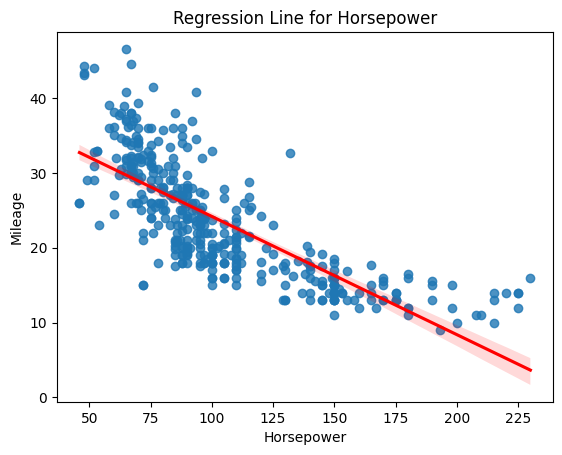

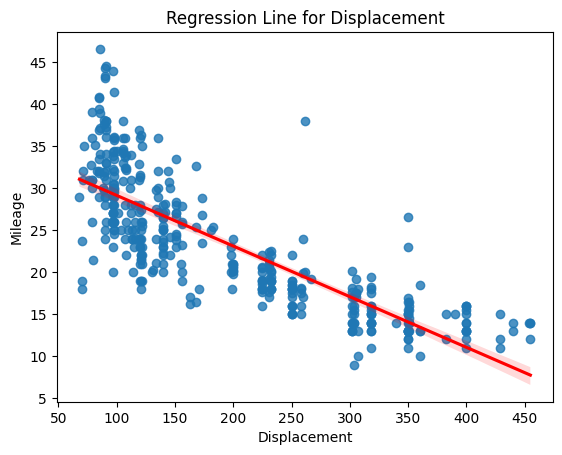

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=data['weight'], y=data['mpg'], scatter=True, line_kws={"color":"red"})
plt.title("Regression Line for Weight")
plt.xlabel("Weight")
plt.ylabel("Mileage")
plt.show()
sns.regplot(x=data['horsepower'], y=data['mpg'], scatter=True, line_kws={"color":"red"})
plt.title("Regression Line for Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("Mileage")
plt.show()
sns.regplot(x=data['displacement'], y=data['mpg'], scatter=True, line_kws={"color":"red"})
plt.title("Regression Line for Displacement")
plt.xlabel("Displacement")
plt.ylabel("Mileage")
plt.show()